In [ ]:
#!pip install tweepy

In [ ]:
#!pip install twitter

In [3]:
#!pip install textblob

In [4]:
#!pip install wordcloud

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
twitter_df= pd.read_csv('Resources/tweets.csv')

In [3]:
posts = twitter_df["Tweet"]
posts

0        b'More than 80% of Expats in Mexico are Happy ...
1        b'RT @cristinacoach: WELCOME TO \n\xf0\x9f\x92...
2        b'RT @BartenEM: Med Twitter: who is familiar w...
3        b'RT @ACAPSproject: #Mexico: +200,000 #migrant...
4        b'WELCOME TO \n\xf0\x9f\x92\x8c\xe2\x9c\xa8\xf...
                               ...                        
27132    b'RT @BajaByBus: Loreto, Mexico, Travel Guide:...
27133    b'F@$# MODERN COLONIALSISM!!!!!\nLEARN THE LAN...
27134    b'Demand #justice for the endangered baby bear...
27135    b'RT @Finstigator: Demand #justice for the end...
27136    b'The elimination of #trachoma as a public hea...
Name: Tweet, Length: 27137, dtype: object

In [4]:
# Create a dataframe with a column called Tweets
#df = pd.DataFrame(twitter_df["Tweets"])
# Show the first 5 rows of data
#df.head()

In [53]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub("^b[\'$]", '', text) # b'
    text = re.sub("\:[\s]", ' ', text) # :
    text = re.sub("\+", '', text) # +
    text = re.sub("F\@\$[\s]+", '', text) #F@$
    text = re.sub("\\\[nxf09f928ce29ca89f8cb7]+", '', text) #\
    text = re.sub("\!", '', text) #!
    text = re.sub("\&\[amp]+", '', text) #&
    text = re.sub("\;", '', text) #;
    text = re.sub("\_", '', text) #_
    text = re.sub("\,", '', text) #,
    text = re.sub("\&\amp+", '', text) #&amp
    text = re.sub("\%", '', text) #%
    text = re.sub("^\s", '', text) #&
    text = re.sub("TUTORIALhope", 'TUTORIAL hope', text) #spaces
    text = re.sub("\&[amp\s]+", '', text) #&
    text = re.sub("\.+", '', text) #.
    
    return text


# Clean the tweets
twitter_df["Tweet"] = twitter_df["Tweet"].apply(cleanTxt)

# Show the cleaned tweets
twitter_df["Tweet"]

0        More than 80 of Expats in Mexico are Happy exp...
1        WELCOME TO CROCHET TUTORIAL hope u like go lis...
2        Med Twitter who is familiar with the Mexican d...
3        Mexico 200000 migrants were intercepted in 202...
4        WELCOME TO CROCHET TUTORIAL hope u like go lis...
                               ...                        
27132    Loreto Mexico Travel Guide Our One-Week Itiner...
27133    MODERN COLONIALSISMLEARN THE LANGUAGE AND STOP...
27134    Demand justice for the endangered baby bear wh...
27135    Demand justice for the endangered baby bear wh...
27136    The elimination of trachoma as a public health...
Name: Tweet, Length: 27137, dtype: object

In [56]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
twitter_df['Subjectivity'] = twitter_df['Tweet'].apply(getSubjectivity)
twitter_df['Polarity'] = twitter_df['Tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
twitter_df

,Date,Tweet,Subjectivity,Polarity
0,21-09-22 15:25,More than 80 of Expats in Mexico are Happy exp...,0.750000,0.6500
1,21-09-22 15:24,WELCOME TO CROCHET TUTORIAL hope u like go lis...,0.900000,0.8000
2,21-09-22 15:24,Med Twitter who is familiar with the Mexican d...,0.250000,0.1875
3,21-09-22 15:22,Mexico 200000 migrants were intercepted in 202...,0.125000,0.0000
4,21-09-22 15:22,WELCOME TO CROCHET TUTORIAL hope u like go lis...,0.900000,0.8000
...,...,...,...,...
27132,12-09-22 17:29,Loreto Mexico Travel Guide Our One-Week Itiner...,0.000000,0.0000
27133,12-09-22 17:28,MODERN COLONIALSISMLEARN THE LANGUAGE AND STOP...,0.300000,0.2000
27134,12-09-22 17:28,Demand justice for the endangered baby bear wh...,0.000000,0.0000
27135,12-09-22 17:27,Demand justice for the endangered baby bear wh...,0.000000,0.0000


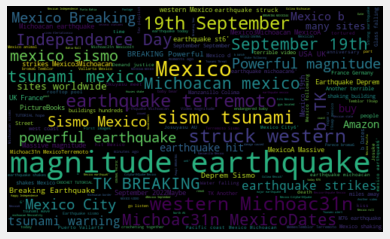

In [57]:
# Word Count
# word cloud visualization
allWords = ' '.join([twts for twts in twitter_df["Tweet"]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [58]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [59]:
#Polarity= {"Negative": -1, "Neutral": 0, "Positive": 1}

twitter_df['Analysis'] = twitter_df['Polarity'].apply(getAnalysis)
# Show the dataframe
twitter_df

,Date,Tweet,Subjectivity,Polarity,Analysis
0,21-09-22 15:25,More than 80 of Expats in Mexico are Happy exp...,0.750000,0.6500,Positive
1,21-09-22 15:24,WELCOME TO CROCHET TUTORIAL hope u like go lis...,0.900000,0.8000,Positive
2,21-09-22 15:24,Med Twitter who is familiar with the Mexican d...,0.250000,0.1875,Positive
3,21-09-22 15:22,Mexico 200000 migrants were intercepted in 202...,0.125000,0.0000,Neutral
4,21-09-22 15:22,WELCOME TO CROCHET TUTORIAL hope u like go lis...,0.900000,0.8000,Positive
...,...,...,...,...,...
27132,12-09-22 17:29,Loreto Mexico Travel Guide Our One-Week Itiner...,0.000000,0.0000,Neutral
27133,12-09-22 17:28,MODERN COLONIALSISMLEARN THE LANGUAGE AND STOP...,0.300000,0.2000,Positive
27134,12-09-22 17:28,Demand justice for the endangered baby bear wh...,0.000000,0.0000,Neutral
27135,12-09-22 17:27,Demand justice for the endangered baby bear wh...,0.000000,0.0000,Neutral


In [68]:
#twitter_df[twitter_df.Analysis == "Negative"].count()
#twitter_df[twitter_df.Analysis == "Positive"].count()
twitter_df[twitter_df.Analysis == "Neutral"].count()

Date            14803
Tweet           14803
Subjectivity    14803
Polarity        14803
Analysis        14803
dtype: int64

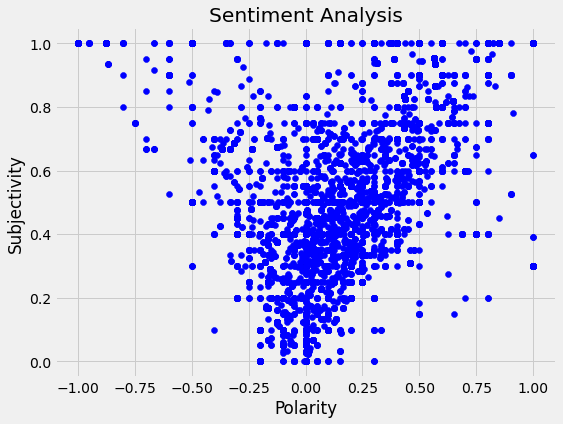

In [74]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, twitter_df.shape[0]):
    plt.scatter(twitter_df["Polarity"][i], twitter_df["Subjectivity"][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [77]:
# Print the percentage of positive tweets
ptweets = twitter_df[twitter_df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

34.7

In [78]:
# Print the percentage of negative tweets
ntweets = twitter_df[twitter_df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

10.8

In [79]:
# Show the value counts
twitter_df['Analysis'].value_counts()

Neutral     14803
Positive     9415
Negative     2919
Name: Analysis, dtype: int64

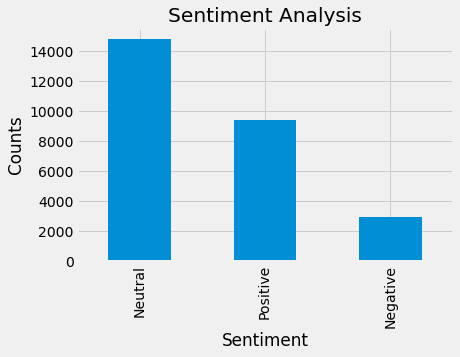

In [80]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()